### Some function test

In [117]:
import numpy as np
import pandas as pd
import sqlite3
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

In [64]:
# read the activity file as activity matrices
acti_1 = pd.read_csv('Activity_file/activity1.tsv', sep = '\t')

acti_2 = pd.read_csv('Activity_file/activity2.tsv', sep = '\t')

In [65]:
acti_1

,gene,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000223972.5,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.166403,0.000000,0.000000,0.000000,0.00000
1,ENSG00000227232.5,4.064030,3.371110,2.68549,4.04762,3.90076,3.639630,1.43859,1.69285,1.566050,...,5.932980,6.13265,4.193780,5.926310,3.062480,4.702530,6.272550,7.190010,5.745540,2.64743
2,ENSG00000278267.1,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,ENSG00000243485.5,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.024264,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.054223,0.000000,0.000000,0.000000,0.00000
4,ENSG00000237613.2,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,ENSG00000198695.2,3517.220000,3598.090000,6637.79000,6374.49000,4972.73000,4635.000000,9631.77000,8319.14000,11516.600000,...,8919.460000,8113.22000,9764.490000,5477.360000,9628.750000,1676.590000,2520.410000,3644.000000,2237.430000,960.29100
56196,ENSG00000210194.1,11.903800,11.203400,24.41390,22.65940,20.58800,18.257600,40.58860,31.35490,78.695300,...,32.932100,31.33400,35.456000,24.934900,33.496300,2.871770,5.795670,10.370100,5.724510,3.49736
56197,ENSG00000198727.2,23839.100000,25511.700000,28799.40000,12919.40000,15943.20000,13051.500000,32931.80000,28346.70000,40960.000000,...,19058.200000,17223.10000,24521.300000,11578.600000,27193.100000,15337.800000,19868.500000,15025.000000,12803.400000,2305.49000
56198,ENSG00000210195.2,0.616205,0.697191,1.50928,0.00000,0.00000,0.544659,3.44476,3.47988,5.581470,...,0.884701,1.11364,0.815455,0.783492,0.803858,0.443781,0.000000,0.000000,0.000000,0.00000


In [5]:
acti_2

,gene,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000223972.5,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,1.000000,0.020408,0.020408,0.020408,0.020408
1,ENSG00000227232.5,0.612245,0.489796,0.387755,0.591837,0.571429,0.551020,0.061224,0.204082,0.142857,...,0.877551,0.897959,0.653061,0.857143,0.448980,0.755102,0.918367,1.000000,0.836735,0.367347
2,ENSG00000278267.1,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
3,ENSG00000243485.5,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.897959,...,0.020408,0.020408,0.020408,0.020408,0.020408,1.000000,0.020408,0.020408,0.020408,0.020408
4,ENSG00000237613.2,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,ENSG00000198695.2,0.244898,0.265306,0.591837,0.551020,0.408163,0.367347,0.877551,0.734694,0.959184,...,0.775510,0.673469,0.897959,0.469388,0.857143,0.040816,0.142857,0.285714,0.102041,0.020408
56196,ENSG00000210194.1,0.306122,0.285714,0.612245,0.591837,0.551020,0.448980,0.897959,0.775510,1.000000,...,0.795918,0.755102,0.877551,0.653061,0.816327,0.020408,0.102041,0.244898,0.081633,0.040816
56197,ENSG00000198727.2,0.469388,0.612245,0.734694,0.183673,0.285714,0.224490,0.857143,0.714286,0.938776,...,0.367347,0.346939,0.510204,0.102041,0.693878,0.265306,0.387755,0.244898,0.163265,0.020408
56198,ENSG00000210195.2,0.367347,0.448980,0.714286,0.020408,0.020408,0.306122,0.877551,0.897959,0.979592,...,0.571429,0.612245,0.530612,0.489796,0.510204,0.244898,0.020408,0.020408,0.020408,0.020408


In [6]:
# define a function to get the effect sizes of specific gene-snp pair
def get_effect_size(database, gene, snp):
    '''
    Get a list of effect sizes for a certain gene-snp pair
    
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT slope FROM simulation WHERE gene_id = ? and variant_id = ?", (gene, snp))
    
    thelist = myCursor.fetchall()
    
    #get all the values into a list
    slope_list = []

    
    for i in range(len(thelist)):
        slope_list.append(thelist[i][0])
        
    return slope_list

In [7]:
database = "/home/charles_zhou/Imlab/singleXcan/SQlite_db/GTEx_eqtl_simulation.db"
gene = "ENSG00000227232.5"
snp = "chr1_64764_C_T_b38"


conn = sqlite3.connect(database)

myCursor = conn.cursor()

myCursor.execute("SELECT slope, tissue_id FROM simulation WHERE gene_id = ? and variant_id = ?", (gene, snp))

thelist = myCursor.fetchall()

In [8]:
size = []
tissue = []
for i in thelist:
    size.append(i[0])
    tissue.append(i[1])

In [45]:
type(thelist)

list

In [9]:
thelist[:5]

[('0.500106', 'Nerve_Tibial'),
 ('0.523131', 'Cells_Cultured_fibroblasts'),
 ('0.368848', 'Thyroid'),
 ('0.477162', 'Brain_Cerebellum'),
 ('0.658996', 'Vagina')]

In [11]:
print(size[:5])
print(tissue[:5])

['0.500106', '0.523131', '0.368848', '0.477162', '0.658996']
['Nerve_Tibial', 'Cells_Cultured_fibroblasts', 'Thyroid', 'Brain_Cerebellum', 'Vagina']


In [7]:
database = "/home/charles_zhou/Imlab/singleXcan/SQlite_db/GTEx_eqtl_simulation.db"
gene = "ENSG00000227232.5"
snp = "chr1_666028_G_A_b38"


conn = sqlite3.connect(database)

myCursor = conn.cursor()

myCursor.execute("SELECT slope, tissue_id FROM simulation WHERE gene_id = ? and variant_id = ?", (gene, snp))

thelist1 = myCursor.fetchall()

In [8]:
thelist1

[('0.521815', 'Nerve_Tibial'),
 ('0.518518', 'Cells_Cultured_fibroblasts'),
 ('0.328992', 'Thyroid'),
 ('0.29027', 'Brain_Cerebellum'),
 ('0.831715', 'Vagina'),
 ('0.498983', 'Colon_Transverse'),
 ('0.411513', 'Skin_Sun_Exposed_Lower_leg'),
 ('0.31442', 'Prostate'),
 ('0.882495', 'Uterus'),
 ('0.489662', 'Whole_Blood'),
 ('0.54536', 'Pancreas'),
 ('0.560902', 'Stomach'),
 ('0.204284', 'Brain_Cerebellar_Hemisphere'),
 ('0.339506', 'Skin_Not_Sun_Exposed_Suprapubic'),
 ('0.528564', 'Breast_Mammary_Tissue'),
 ('0.371935', 'Adipose_Subcutaneous'),
 ('0.518862', 'Spleen'),
 ('0.377052', 'Artery_Tibial'),
 ('0.467178', 'Esophagus_Mucosa'),
 ('0.83324', 'Ovary'),
 ('0.305966', 'Brain_Caudate_basal_ganglia'),
 ('0.292745', 'Brain_Hypothalamus'),
 ('0.450967', 'Artery_Aorta'),
 ('0.335347', 'Liver'),
 ('0.402672', 'Heart_Left_Ventricle'),
 ('0.439049', 'Muscle_Skeletal'),
 ('0.328266', 'Heart_Atrial_Appendage'),
 ('0.365362', 'Esophagus_Gastroesophageal_Junction'),
 ('0.204086', 'Brain_Hippocamp

In [12]:
# get the activity list at first
activity_list1 = []
for i in range(len((acti_2.loc[acti_2['gene'] == "ENSG00000227232.5"]).to_numpy()[0])):
    if i == 0:
        continue
    else:
        activity_list1.append((acti_2.loc[acti_2['gene'] == "ENSG00000227232.5"]).to_numpy()[0][i])



In [15]:
acti_2

,gene,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,Brain_Caudate_basal_ganglia,...,Skin_Not_Sun_Exposed_Suprapubic,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood
0,ENSG00000223972.5,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,1.000000,0.020408,0.020408,0.020408,0.020408
1,ENSG00000227232.5,0.612245,0.489796,0.387755,0.591837,0.571429,0.551020,0.061224,0.204082,0.142857,...,0.877551,0.897959,0.653061,0.857143,0.448980,0.755102,0.918367,1.000000,0.836735,0.367347
2,ENSG00000278267.1,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
3,ENSG00000243485.5,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.897959,...,0.020408,0.020408,0.020408,0.020408,0.020408,1.000000,0.020408,0.020408,0.020408,0.020408
4,ENSG00000237613.2,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,...,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408,0.020408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,ENSG00000198695.2,0.244898,0.265306,0.591837,0.551020,0.408163,0.367347,0.877551,0.734694,0.959184,...,0.775510,0.673469,0.897959,0.469388,0.857143,0.040816,0.142857,0.285714,0.102041,0.020408
56196,ENSG00000210194.1,0.306122,0.285714,0.612245,0.591837,0.551020,0.448980,0.897959,0.775510,1.000000,...,0.795918,0.755102,0.877551,0.653061,0.816327,0.020408,0.102041,0.244898,0.081633,0.040816
56197,ENSG00000198727.2,0.469388,0.612245,0.734694,0.183673,0.285714,0.224490,0.857143,0.714286,0.938776,...,0.367347,0.346939,0.510204,0.102041,0.693878,0.265306,0.387755,0.244898,0.163265,0.020408
56198,ENSG00000210195.2,0.367347,0.448980,0.714286,0.020408,0.020408,0.306122,0.877551,0.897959,0.979592,...,0.571429,0.612245,0.530612,0.489796,0.510204,0.244898,0.020408,0.020408,0.020408,0.020408


In [ ]:
activity_vector = []
for tiss in tissue:

    activity_vector.append((acti_2.loc[acti_2['gene'] == "ENSG00000227232.5"])[tiss].to_list()[0])
    
len(activity_vector[:40])

In [39]:
(acti_2.loc[acti_2['gene'] == "ENSG00000227232.5"])[tissue[3]].to_list()

[0.816326530612245]

### Modified version

In [66]:
## put the unmodified functions here

# define a function to get the full list of gene_id

def get_gene_id (database):
    '''
    Get the full list of genes
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT DISTINCT gene_id FROM simulation")
    
    thelist = myCursor.fetchall()
    
    #get all the values into a list
    gene_list = []

    
    for i in range(len(thelist)):
        gene_list.append(thelist[i][0])
        
    return gene_list  






# define a function to get the full list of variant_id for specific gene in original table (not prioritized list)

def get_snp_id (database, gene):
    '''
    Get the full list of genes
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT DISTINCT variant_id FROM simulation WHERE gene_id = ?", (gene,))
    
    thelist = myCursor.fetchall()
    
    #get all the values into a list
    snp_list = []

    
    for i in range(len(thelist)):
        snp_list.append(thelist[i][0])
        
    return snp_list 








# define a function to get all gene-snp pairs from the database
def get_gene_snp_pairs(database):
    # Get the full list genes in the table "eqtl":
    gene_list = get_gene_id(database)

    # For each gene, get the full list of snps:
    gene_snp_list = []
    for i in gene_list:
        snp_list = get_snp_id(database, i)
        for j in snp_list:
            gene_snp_list.append((i,j))
    
    return gene_snp_list




# define a function to compute the mean-square-error
def MSE(y_test, x_test, bhat):
    
    N = len(y_test)
    result = ((LA.norm(x_test * bhat - y_test))**2)/N
    
    return result




# define a funtion to compute the MSE with mean of training set as a predictor
def MSE_2(y_test, y_train):
    N = len(y_test)
    train_mean = np.mean(y_train)
    
    mean_list = np.array([train_mean] * N)
    result =  ((LA.norm(mean_list - y_test))**2)/N
    return result

In [67]:
# Modified part

# define a function to get the effect sizes of specific gene-snp pair
def get_effect_size(database, gene, snp):
    '''
    Get a list of effect sizes for a certain gene-snp pair
    
    '''
    
    conn = sqlite3.connect(database)

    myCursor = conn.cursor()
    
    myCursor.execute("SELECT slope, tissue_id FROM simulation WHERE gene_id = ? and variant_id = ?", (gene, snp))
    
    thelist = myCursor.fetchall()
    
    size = []
    tissue = []
    
    for i in thelist:
        size.append(i[0])
        tissue.append(i[1])

    return size, tissue


In [68]:
# Modified part
# define a function to get the "activity" vector for specific gene
def gene_activity_vector(activity_matrix, gene, tissue_vector):
    
    activity_vector = []
    for tiss in tissue_vector:

        activity_vector.append((acti_2.loc[acti_2['gene'] == gene])[tiss].to_list()[0])

    return activity_vector

In [69]:
# modified part
# define a function to run regression and output the results with gene_snp_list and activity_matrix on hand
def linear_regression(gene_snp_list, activity_matrix):
    
    # This is a list to insert the mse_variance pair
    mse_var_pair = []

    for pairs in gene_snp_list:

        
        # get the effect size list
        effect_size = get_effect_size(database, pairs[0], pairs[1])[0]
        tissue_list = get_effect_size(database, pairs[0], pairs[1])[1]
        # change string into float number
        effect_size = list(map(float, effect_size))
        
        
        # get the activity vector
        activity_list = gene_activity_vector(activity_matrix, pairs[0], tissue_list)


        if len(effect_size) != len(activity_list):
            continue

        else:

            # trainning set
            x_train = activity_list[0:39]
            y_train = effect_size[0:39]


            # test set
            x_test = activity_list[40:48]
            y_test = effect_size[40:48]



            # run the regression
            model = linear_model.LinearRegression(fit_intercept = False)

            x_train_0 = np.array(x_train).reshape(-1,1)
            y_train_0 = np.array(y_train).reshape(-1,1)


            model.fit(x_train_0, y_train_0)
            beta_hat = model.coef_ # This is the estimated independent effect size


            # get the MSE and variance of the test_set
            mse = MSE(y_test, x_test, beta_hat)
            test_var = MSE_2(y_test, y_train)

            # record the mes_var pair
            mse_var_pair.append((mse, test_var))
        
            
            
    return mse_var_pair

In [70]:
# perform the regression and let's see what happens then
database = "/home/charles_zhou/Imlab/singleXcan/SQlite_db/GTEx_eqtl_simulation.db"
gene_snp_list = get_gene_snp_pairs(database)

In [147]:
len(gene_snp_list)

25709

In [72]:
gene_snp_list1 = gene_snp_list[:5]
gene_snp_list1

[('ENSG00000227232.5', 'chr1_1000018_G_A_b38'),
 ('ENSG00000227232.5', 'chr1_1000079_A_G_b38'),
 ('ENSG00000227232.5', 'chr1_1000112_G_T_b38'),
 ('ENSG00000227232.5', 'chr1_1000291_C_G_b38'),
 ('ENSG00000227232.5', 'chr1_1000335_C_T_b38')]

In [78]:
int(len(gene_snp_list)/100)

257

In [3]:
mse1_mse2_pair = []


for i in range(int(len(gene_snp_list)/100)):
    if len(gene_snp_list) - i * 100 > 100:
        gene_snp_list_part = gene_snp_list[i*100 : (i+1)*100]
    else:
        gene_snp_list_part = gene_snp_list[i*100 : len(gene_snp_list)]
    
    mse1_mse2_pair.append(linear_regression(gene_snp_list_part, acti_2))
    print("Complete {:.2%} of the computation".format(i/int(len(gene_snp_list)/100)))

In [96]:
mse1_mse2_modi = []
for i in range(len(mse1_mse2_pair)):

    for pair in mse1_mse2_pair[i]:
        mse1_mse2_modi.append(pair)

In [137]:
len(mse1_mse2_modi)

25700

In [146]:
str(mse1_mse2_modi[0][1])

'0.11533776445401991'

In [140]:
def save_mse_var(mse_var_pair, path):
    textfile = open(path, "w")

    textfile.write("MSE" + "\t" + "test_var" + "\n")

    for element in mse_var_pair:

        textfile.write(str(element[0]) + "\t" + str(element[1]) +"\n")
    textfile.close()

In [141]:
path = "MSE1_MSE2.csv"
save_mse_var(mse1_mse2_modi , path)

In [123]:
mse0 = []
var0 = []


for pair in mse1_mse2_modi:
    mse0.append(pair[0])
    var0.append(pair[1])

    
mse0_modi = [x for x in mse0 if math.isnan(x) == False]
var0_modi = [x for x in var0 if math.isnan(x) == False]
    
effect_size_min = np.min(var0_modi)
effect_size_max = np.max(var0_modi)

<ipython-input-124-a4e4577bafac>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([effect_size_min, effect_size_max], [effect_size_min, effect_size_max], 'k-', color = 'r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


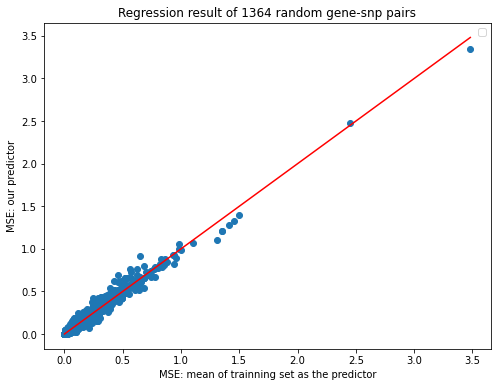

In [124]:
plt.figure(figsize=(8, 6))
plt.plot(var0, mse0, 'o')
plt.plot([effect_size_min, effect_size_max], [effect_size_min, effect_size_max], 'k-', color = 'r')
plt.title("Regression result of 1364 random gene-snp pairs")
plt.ylabel("MSE: our predictor")
plt.xlabel("MSE: mean of trainning set as the predictor")
plt.legend()
plt.show()

In [126]:
percent = 0
for i in range(len(mse1_mse2_modi)):
    if mse1_mse2_modi[i][0] <= mse1_mse2_modi[i][1]:
        percent += 1

print(percent/len(mse1_mse2_modi))

0.11501945525291829


In [135]:
count = 0
for i in range(len(mse0_modi)):
    if mse0_modi[i] <= var0_modi[i]:
        count = count + 1
count/len(mse0_modi)

0.46913188382796384